# Часть 1 - Работа с библиотекой NumPy

## Задача №1

Создать матрицу размером 8х8 элементов, состоящую из нулей. Заполнить эту матрицу значениями, расположенными в шахматном порядке. Задачу решить через срезы массива NumPy.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a = np.zeros((8, 8), int) # Создадим нулевую матрицу 8х8
a

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])

In [3]:
a[1::2, ::2] = 1 # выберет все строки, начиная со второй и с шагом 2 и в соответствие поставит столбцы, начиная с первого с шагом 2
a

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0, 1, 0]])

In [4]:
a[::2, 1::2] = 1 # выберет все строки, начиная с первой и с шагом 2 и в соответствие поставит столбцы, начиная со второго с шагом 2
a

array([[0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0]])

Нашел еще одно решение с помощью функции *numpy.tile (b , reps)* - строит массив, повторив массив b reps число раз.

In [5]:
b = np.array([[0,1],[1,0]])
b

array([[0, 1],
       [1, 0]])

In [6]:
B = np.tile(b, (4,4)) # повторили массив "b" 4 раза построчно и 4 раза по столбцам
B

array([[0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0]])

In [7]:
# Записываем массив в файл CSV
np.savetxt("array.csv", B, delimiter=",", fmt="%d") # файл будет называться array.csv, записываем его от переменной B, разделитель запятая, формат данных целое число

## Задача №2

Средствами NumPy сформируйте вектор из 2000 случайных величин, распределенных по нормальному закону с математическим ожиданием 0 и дисперсией 5. Средствами NumPy вычислите для полученного вектора экспериментальное значение математического ожидания (среднее значение) и дисперсию.


In [8]:
# Создадим нормальное распределение с мат ожиданием 0 и средним квадратичным отклонением (корень из дисперсии 5).

sko = np.sqrt(5) # среднее квадратичное отклонение
mo = 0 # мат ожидание

# зададим точку отсчета
np.random.seed(123)
vektor = np.random.normal(mo, sko, 2000)


In [9]:
vektor

array([-2.42754383,  2.23013222,  0.63275916, ..., -0.80341188,
       -3.59938763,  0.03034358])

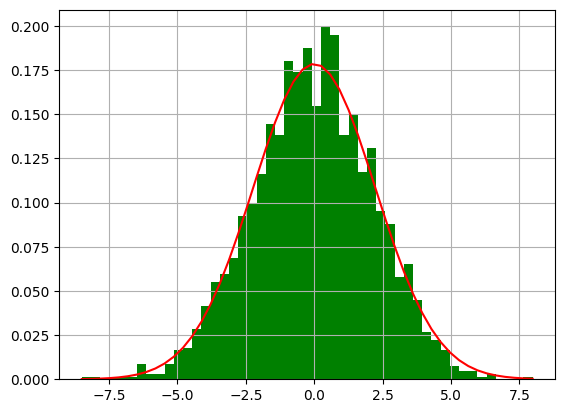

In [ ]:
# Построим график плотности распределения
count, bins, ignored = plt.hist(vektor, 49, 
                                density=True,  
                                color='green') 
x = np.linspace(min(bins), 
                max(bins)) 
  
pdf = 1/(sko * np.sqrt(2 * np.pi)) * np.exp( - (bins - mo)**2 / (2 * sko**2)) # Плотность вероятности для Распределения Гаусса
  
# assign other attributes 
plt.plot(x, pdf, color='red') 
plt.grid() 
plt.show() 

In [20]:
print(f'Экспериментальное значение мат. ожидания (среднего значения) в scipy.stats: {vektor.mean():.3f}')
print(f'Экспериментальное значение мат. ожидания (среднего значения) в numpy: {np.mean(vektor):.3f}')

Экспериментальное значение мат. ожидания (среднего значения) в scipy.stats: -0.035
Экспериментальное значение мат. ожидания (среднего значения) в numpy: -0.035


In [22]:
print(f'Экспериментальное значение дисперсии в scipy.stats: {vektor.var():.3f}')
print(f'Экспериментальное значение дисперсии в numpy: {np.var(vektor):.3f}')

Экспериментальное значение дисперсии в scipy.stats: 4.801
Экспериментальное значение дисперсии в numpy: 4.801


# Часть 2 - Работа с библиотекой Pandas